input degree (m) of legendre function to plot:4
input order  (n) of legendre function to plot:5


/home/manmeet/anaconda3/envs/pyspharm/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:5092: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return npsel.concatenate((a,a[slicer]),axis=axis)


(-2.1059783, 2.1059783)


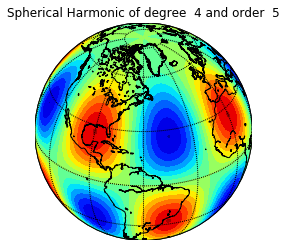

In [3]:
from mpl_toolkits.basemap import Basemap, addcyclic
from spharm import Spharmt, getspecindx
import matplotlib.pyplot as plt
import numpy as np
# set up orthographic map projection.
map = Basemap(projection='ortho',lat_0=30,lon_0=-60,resolution='l')
# draw coastlines, country boundaries, fill continents.
map.drawcoastlines()
# draw the edge of the map projection region (the projection limb)
map.drawmapboundary()
# draw lat/lon grid lines every 30 degrees.
map.drawmeridians(np.arange(0,360,30))
map.drawparallels(np.arange(-90,90,30))
min = int(raw_input('input degree (m) of legendre function to plot:'))
nin = int(raw_input('input order  (n) of legendre function to plot:'))
nlons = 720; nlats = 361
x = Spharmt(nlons,nlats,legfunc='computed')
ntrunc = nlats-1
indxm, indxn = getspecindx(ntrunc)
nm = -1
i = 0
for m,n in zip(indxm,indxn):
    if m  == min and n == nin:
        nm = i
        exit
    else:
        i = i + 1
if nm < 0:
    raise ValueError('invalid m,n - must fit within triangular truncation at wavenumber '+repr(ntrunc))
coeffs = np.zeros((ntrunc+1)*(ntrunc+2)/2,np.complex)
coeffs[nm] = 1.
spharmonic = x.spectogrd(coeffs)
delta = 360./nlons
lats = 90.-delta*np.arange(nlats)
lons = delta*np.arange(nlons)
spharmonic, lons = addcyclic(spharmonic, lons)
print(spharmonic.min(), spharmonic.max())
lons, lats = np.meshgrid(lons, lats)
x, y = map(lons,lats)
CS = map.contourf(x,y,spharmonic,15,cmap=plt.cm.jet)
plt.title('Spherical Harmonic of degree %2i and order %2i'% (min,nin))
plt.show()
